In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
%matplotlib inline

In [3]:
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)

In [4]:
print(data)

(array([[  0.99429187,   0.87511711,  -9.99909683],
       [  0.65761885,   0.91624771, -10.18458517],
       [ -6.48804352,   3.29034852,   6.73159871],
       [  0.5815206 ,   2.06249948,  -9.07157495],
       [ -7.42442678,   5.30835517,   6.86341624],
       [  2.26790487,   0.40816482, -10.17230518],
       [  1.62073713,  -0.05416228,  -9.92461083],
       [  2.41199108,   1.03683306,  -9.20017913],
       [ -7.62441747,   5.87096075,   5.41069708],
       [ -7.34160752,   3.671108  ,   7.36634568],
       [ -7.56358517,   3.5736335 ,   5.34284552],
       [  2.22972735,   1.6514787 ,  -7.43386319],
       [ -0.75249891,   2.31574949,  -9.26873428],
       [  0.54946324,   0.5581557 ,  -7.88852506],
       [ -0.4308995 ,   0.48011452,  -8.47545896],
       [ -1.19436032,   2.54705473,  -8.90232874],
       [ -0.06318407,   2.4416449 , -11.40312057],
       [ -6.70999871,   3.8246846 ,   7.34365184],
       [  1.32054601,   2.60559237, -10.47729501],
       [  0.15391601,   2.1934

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [7]:
scaled_data

array([[ 0.87649968,  0.22853374,  0.07476374],
       [ 0.84785217,  0.2348852 ,  0.06594552],
       [ 0.23982771,  0.60149768,  0.8701502 ],
       [ 0.84137697,  0.41189125,  0.11885864],
       [ 0.16015085,  0.91312154,  0.87641688],
       [ 0.98487142,  0.15642622,  0.06652932],
       [ 0.92980391,  0.08503292,  0.07830484],
       [ 0.99713171,  0.25350618,  0.11274473],
       [ 0.14313364,  1.        ,  0.80735381],
       [ 0.16719794,  0.66029518,  0.90032642],
       [ 0.14830987,  0.64524301,  0.80412811],
       [ 0.98162289,  0.34842076,  0.19671636],
       [ 0.72786524,  0.45099853,  0.10948558],
       [ 0.83864921,  0.17958805,  0.17510148],
       [ 0.75523013,  0.1675368 ,  0.14719832],
       [ 0.69026725,  0.48671705,  0.1269047 ],
       [ 0.78651904,  0.4704395 ,  0.00801568],
       [ 0.22094154,  0.68401073,  0.89924755],
       [ 0.90426064,  0.49575653,  0.05202993],
       [ 0.80499209,  0.43211924,  0.08357411],
       [ 0.81983375,  0.47008294,  0.094

In [8]:
data_x = scaled_data[:, 0]
data_y = scaled_data[:, 1]
data_z = scaled_data[:, 2]

In [9]:
from mpl_toolkits.mplot3d import Axes3D

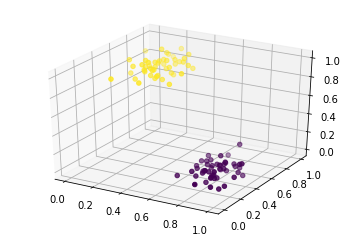

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x, data_y, data_z, c = data[1])

In [12]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [13]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [14]:
learning_rate = 0.01

In [15]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [16]:
loss = tf.reduce_mean(tf.square(outputs-X))

In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [19]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(
            train,
            feed_dict = {X:scaled_data}
        )
        
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [20]:
output_2d

array([[ 0.61933821, -0.34002787],
       [ 0.60252792, -0.34387884],
       [ 0.07021342,  0.19023591],
       [ 0.54303581, -0.29533657],
       [-0.0630006 ,  0.22562236],
       [ 0.70112979, -0.35490519],
       [ 0.68924493, -0.35295668],
       [ 0.67542052, -0.31843963],
       [-0.08937852,  0.19290519],
       [ 0.00970224,  0.21596676],
       [ 0.01408675,  0.15745801],
       [ 0.63062745, -0.2587432 ],
       [ 0.46965128, -0.29396361],
       [ 0.60089433, -0.28340209],
       [ 0.5608204 , -0.29882193],
       [ 0.4366352 , -0.2790696 ],
       [ 0.50817102, -0.35464954],
       [ 0.03312929,  0.21598262],
       [ 0.56187236, -0.32932931],
       [ 0.52092326, -0.31351602],
       [ 0.51728922, -0.30392173],
       [-0.0172881 ,  0.28534448],
       [ 0.53021669, -0.2957201 ],
       [ 0.57150114, -0.30764937],
       [ 0.10537536,  0.17917895],
       [-0.01360793,  0.18220264],
       [ 0.69351989, -0.37401742],
       [ 0.09114027,  0.16346532],
       [ 0.06249292,

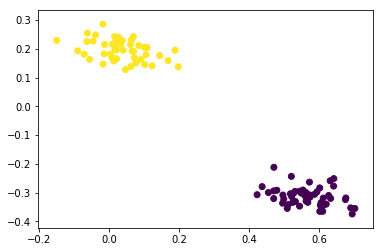

In [22]:
plt.scatter(output_2d[:, 0], output_2d[:, 1], c=data[1])